# Logistic Regression

Author: Filip Kołodziejczyk

## Prerequisites

In [24]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

## Theoretical Introduction

$$y_i = \{0, 1\}$$
$$x_i = (x_{i1}, x_{i2}, \ldots, x_{ip})$$
$$P(y_i = 1 | x_i) = \sigma(\Beta_0 + \Beta x_i^T)$$
$$\sigma(s) = \frac{1}{1 + e^{-s}} \quad \textrm{(sigmoid function)}$$
$$P(y_i = 0 | x_i) = 1 - P(y_i = 1 | x_i)$$
$$P(y_1 = 1 | x_1) \geq 0.5 \quad \Rightarrow \quad \textrm{assign } x_1 \textrm{ to class 1}$$
$$P(y_1 = 1 | x_1) \geq 0.5 \quad \Leftrightarrow \quad x_i^T \Beta + \Beta_0 \gt 0 \quad \textrm{(linearity)}$$
$$L(\beta, \beta_0) = \sum_{i=1}^n log P(y_i | x_i) = \sum_{i=1}^n y_i log \sigma(\beta_0 + \beta x_i^T) + (1 - y_i) log (1 - \sigma(\beta_0 + \beta x_i^T))$$
$$\hat{\Beta}, \hat{\Beta_0} = \argmax_{\beta, \beta_0} [-L(\beta, \beta_0)]$$
$$\hat{\Beta}, \hat{\Beta_0} = \argmax_{\beta, \beta_0} [-L(\beta, \beta_0) + \lambda ||\beta||_2^2] \quad \textrm{(L2 regularization)}$$


## Task 2

### Instructions

Generate data from logistic model:
$$y_i \sim Bern(p_i)$$
$$p_i = \frac{1}{1 + \exp{[-(\beta_0 + \beta_1 x_{i1} + \dots + \beta_5 x_{i5})}]}$$
for $i = 1, \dots, n$, $x_{i1}, \dots, x_{i5} \sim N(0,1)$, $n = 50$.  
Parameters $\beta_0 = 0.5, \beta_1 = \dots = \beta_5 = 1$.  
Fit logistic model and calculate the estimators of coefficients $\hat{\beta} = (\hat{\beta_1}, \dots, \hat{\beta_5})$.
Repeat the experiment $L = 100$ times and compute MSE ($||\cdot||$ is Euclidean norm)
$$MSE = E[||\hat{\beta} - \beta||^2]$$

In [25]:
b0 = 0.5
b = np.ones(5)
L = 100  # number of experiment repetitions


def generate_data(n) -> tuple[np.array, np.array]:
    def _p(x: np.array) -> float:
        denom = 1 + np.exp(-b0 - np.dot(b, x))
        return 1 / denom

    def _y(p: float) -> int:
        return np.random.binomial(1, p)

    X = np.random.normal(size=(n, 5))
    y = np.array([_y(_p(x)) for x in X])
    return X, y


def experiment(X: np.array, y: np.array) -> np.array:
    model = LogisticRegression(C=1000)
    model.fit(X, y)
    b_approx = model.coef_
    return b_approx

### Task 2.1

Repeat the experiment for $n = 50, 60, 70, 80, 90, 100, 200, 300 . . . , 1000$ and make a plot showing how $MSE$ depends on $n$.

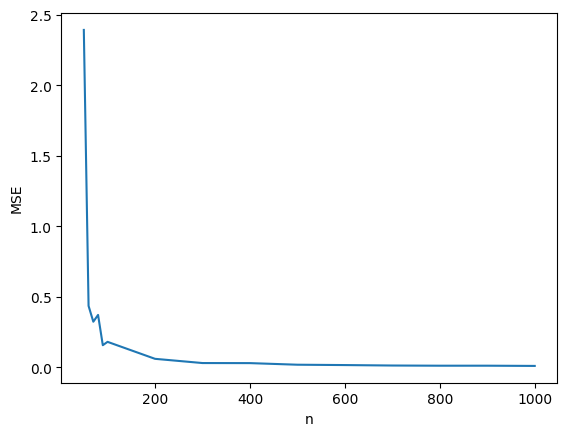

In [29]:
# Generate sequence from 50 to 100 by 10 and concat with sequence from 200 to 1000 by 100
n_values = np.concatenate([np.arange(50, 100, 10), np.arange(100, 1001, 100)])

mse_values = []

data = [generate_data(n) for _ in range(L) for n in n_values]
for n in n_values:
    b_approx = np.array([experiment(n) for _ in range(L)])
    mse = np.mean((b_approx - b)**2)
    mse_values.append(mse)

# plot
plt.plot(n_values, mse_values)
plt.xlabel('n')
plt.ylabel('MSE')
plt.show()

### Task 2.2

Using the same datasets, train the model based only on 3 variables: $x_{i1}, x_{i2}, x_{i3}$ and draw the analogous curve showing how $MSE$ for $\beta = (\beta_1, \beta_2, \beta_3)$ depends on $n$.